<a href="https://colab.research.google.com/github/2303A51055/AIML-2025_B16/blob/main/LAB_EXAM_1055.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = load_iris()
X, y = data.data, data.target



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


data = load_iris()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred_rf = rf_classifier.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


y_pred_dt = dt_classifier.predict(X_test)


accuracy_dt = accuracy_score(y_test, y_pred_dt)


print("Random Forest Accuracy:", accuracy_rf)
print("Decision Tree Accuracy:", accuracy_dt)

Random Forest Accuracy: 1.0
Decision Tree Accuracy: 1.0


In [9]:
importances = rf_classifier.feature_importances_


feature_importance = sorted(zip(data.feature_names, importances), key=lambda x: x[1], reverse=True)


print("Feature Importances:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
petal width (cm): 0.4340
petal length (cm): 0.4173
sepal length (cm): 0.1041
sepal width (cm): 0.0446


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too fe

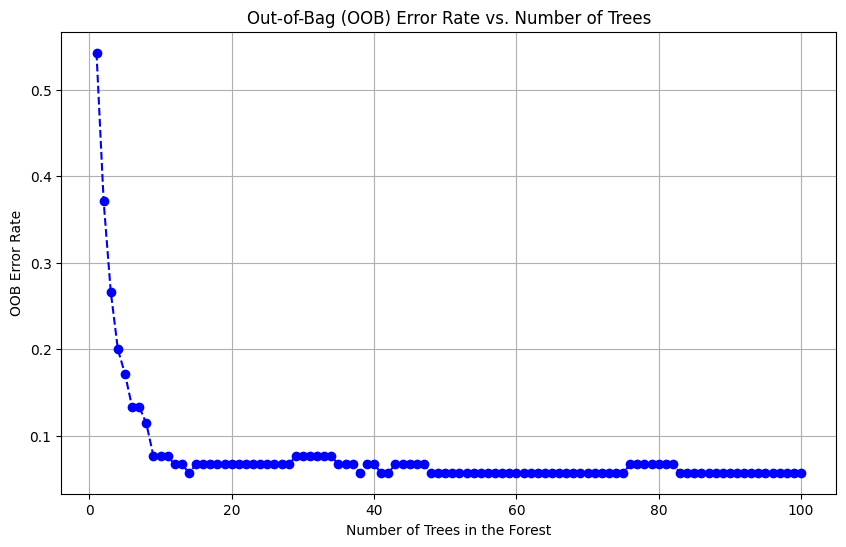

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


data = load_iris()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


oob_errors = []
for n_trees in range(1, 101):
    rf_temp = RandomForestClassifier(n_estimators=n_trees, oob_score=True, random_state=42, bootstrap=True)
    rf_temp.fit(X_train, y_train)
    oob_errors.append(1 - rf_temp.oob_score_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), oob_errors, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Trees in the Forest")
plt.ylabel("OOB Error Rate")
plt.title("Out-of-Bag (OOB) Error Rate vs. Number of Trees")
plt.grid()
plt.show()

F1-Score (Weighted): 1.0000


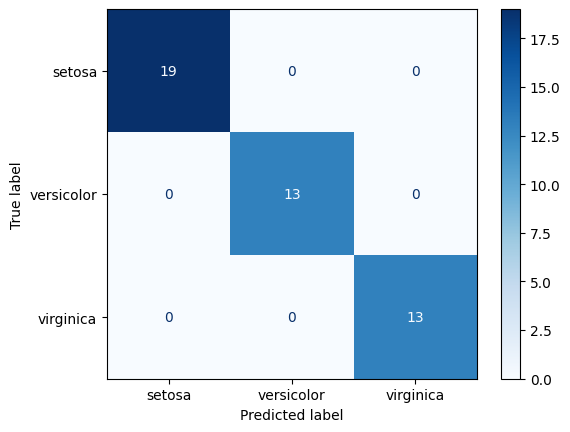

In [11]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


data = load_iris()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred_rf = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)


f1 = f1_score(y_test, y_pred_rf, average='weighted')

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
cm_display.plot(cmap='Blues')


print(f"F1-Score (Weighted): {f1:.4f}")